In [226]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# Importing libraries and data

In [227]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [228]:
# Importing Data
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin1')

# EDA

In [229]:
# Looking at dataset
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [231]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [232]:
# Droping unecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [233]:
# Converting catagorical to numerical values
df.v1 = df.v1.apply(lambda x : 1 if x=='spam' else 0)

In [234]:
df.v1

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [235]:
# renaming columns
df.rename(columns={"v1": "target", "v2": "text"},inplace=True)

In [236]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [237]:
df.duplicated().sum()

403

In [238]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


# Spliting Data

In [240]:
X=df.text
y=df.target

In [241]:
# Splitting the data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [242]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(3618,)
(1551,)


In [243]:
# Create a TF-IDF vectorizer to convert text messages to numerical features

feature = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

# Convert the training and testing text messages into numerical features using TF-IDF

X_train_f = feature.fit_transform(X_train)
X_test_f = feature.transform(X_test)


In [244]:
print(X_train_f)

  (0, 274)	0.28469841570534354
  (0, 757)	0.2382703692823207
  (0, 309)	0.28469841570534354
  (0, 5479)	0.28469841570534354
  (0, 1666)	0.18521698912601275
  (0, 3176)	0.28469841570534354
  (0, 6726)	0.16969158756163835
  (0, 6243)	0.28469841570534354
  (0, 603)	0.24274243659325892
  (0, 2157)	0.1929056107731498
  (0, 6682)	0.2059490803121428
  (0, 6265)	0.15269186047504035
  (0, 5701)	0.24274243659325892
  (0, 6566)	0.16515206653974776
  (0, 6468)	0.23079712301516783
  (0, 2768)	0.21505634607080928
  (0, 4120)	0.22760511302317224
  (0, 234)	0.20290236667023745
  (0, 6626)	0.18521698912601275
  (1, 1536)	0.5888338190512723
  (1, 6486)	0.5280141801118141
  (1, 3501)	0.4067379480769643
  (1, 2132)	0.45720892460283746
  (2, 5579)	0.4697175168946937
  (2, 2524)	0.6743730717061566
  :	:
  (3612, 4940)	0.4429207609150278
  (3612, 3694)	0.38321599910309895
  (3612, 6141)	0.4110511297018481
  (3613, 3066)	1.0
  (3614, 782)	0.6262002443728721
  (3614, 2608)	0.468640976347078
  (3614, 5588)	0.36

In [245]:
print(y_train)

2118    1
1019    0
1881    0
2575    0
4858    0
       ..
3534    0
1124    0
2628    0
3833    0
2694    0
Name: target, Length: 3618, dtype: int64


# Modeling (LR)

In [246]:
model = LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [247]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_f)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_f)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.01990049751244 %
Accuracy on test data: 95.80915538362346 %


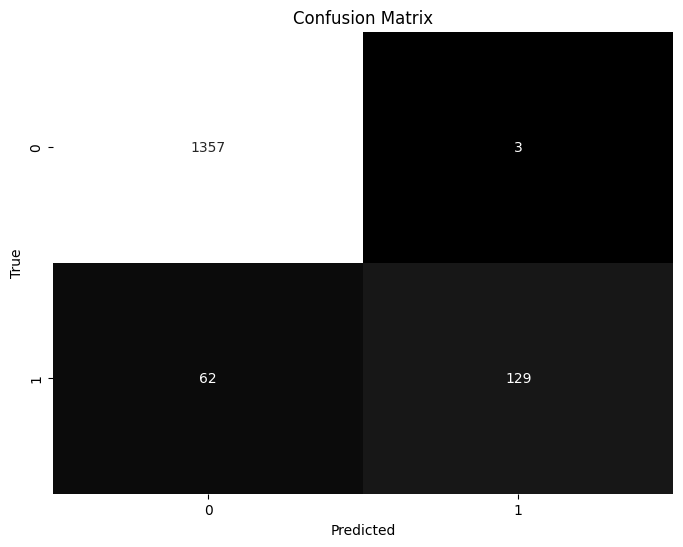

In [248]:
# Data Visualisation - Confusion Matrix

cm = confusion_matrix(y_test,prediction_on_test_data)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="gray", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()